# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%205-%20Linear%20Regression%20(ML%20approach)/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Polynomial Regression

Polynomial regression extends the linear model by adding extra predictors, obtainded by raising each of the original predictors to a power. This approach provides a simple way to provide a **non-linear fit** to data. The model however is still **linear**.

First we need to import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Why Polynomial Regression?

Let's generate some random data set based on true model f(x)

$$y =f(x)= x + 2x^2- 3 x^3 + \epsilon$$

In [3]:
np.random.randn(5)

array([ 1.40502964,  0.31641512, -1.64302414, -1.13805954, -0.082005  ])

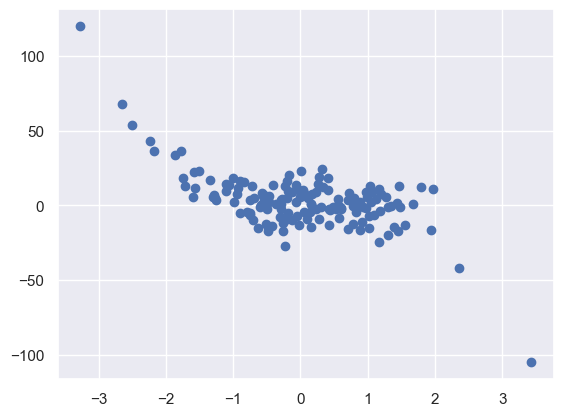

In [4]:
np.random.seed(102)
x = np.random.randn(150)
y = x + 2 * (x ** 2) -3 * (x ** 3) + 5*np.random.normal(0,2,150)
plt.scatter(x,y)
plt.show()

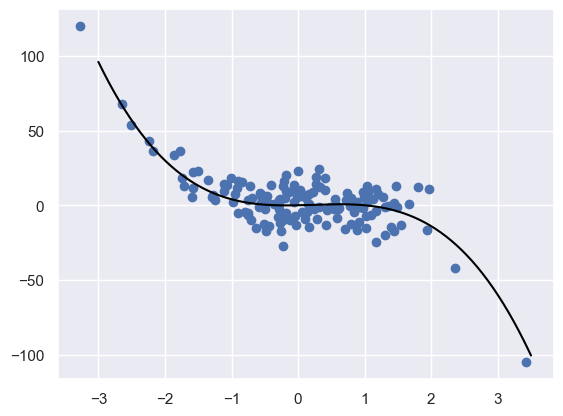

In [5]:
plt.scatter(x,y)
# let's add the unobservable true model
w=np.linspace(-3,3.5,500)
z= w+ 2*(w**2) - 3*(w**3)
plt.plot(w,z, c='black')
plt.show()

###  Polynomial transformation of the data

In [6]:
type(x)

numpy.ndarray

In [7]:
x[0:5]

array([ 1.6680683 ,  0.92586182,  1.05799677, -0.92033901,  1.29974847])

In [7]:
x.reshape(-1,1) [0:5]
# this is equivalent to x.reshape(100,1)[0:5]

array([[ 1.6680683 ],
       [ 0.92586182],
       [ 1.05799677],
       [-0.92033901],
       [ 1.29974847]])

In [8]:
polynomial_degree = 5
poly = PolynomialFeatures(degree =polynomial_degree)

In [9]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339


###  Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=100)

In [11]:
X_train.head()

,0,1,2,3,4,5
81,1.0,-0.223170,0.049805,-0.011115,0.002481,-0.000554
99,1.0,-0.402487,0.161995,-0.065201,0.026243,-0.010562
119,1.0,-0.593892,0.352707,-0.209470,0.124402,-0.073882
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815
16,1.0,-1.712263,2.931844,-5.020086,8.595707,-14.718108


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
df.rename()

In [14]:
# R2 of the model
R2_train = model.score(X_train, y_train)
R2_test  = model.score(X_test , y_test )

print(f"R2 train set = {R2_train}")
print(f"R2 test  set = {R2_test }")

R2 train set = 0.7586145884660105
R2 test  set = 0.5349450853657305


### Plotting the Regression fit!

In [15]:
train_data = pd.DataFrame( {"x" :X_train[1] , "y" :y_train, "y_hat":model.predict(X_train) , "data_set":"train"})
test_data  = pd.DataFrame( {"x" :X_test[1] , "y" :y_test, "y_hat":model.predict(X_test) , "data_set":"test"})
plot_data  = pd.concat([train_data, test_data]).sort_index()
plot_data.head(20)

,x,y,y_hat,data_set
0,1.668068,0.877150,-2.659940,train
1,0.925862,-1.001049,-0.157750,test
2,1.057997,9.195978,-0.097698,train
3,-0.920339,11.654877,4.128167,train
4,1.299748,-19.616710,-0.412279,train
5,0.331183,12.425754,-1.067838,train
6,-0.509845,-12.685204,0.434898,train
7,-0.903099,16.091328,3.919609,train
8,-0.130016,9.141361,-1.017485,train
9,-2.238203,43.058143,40.990997,train


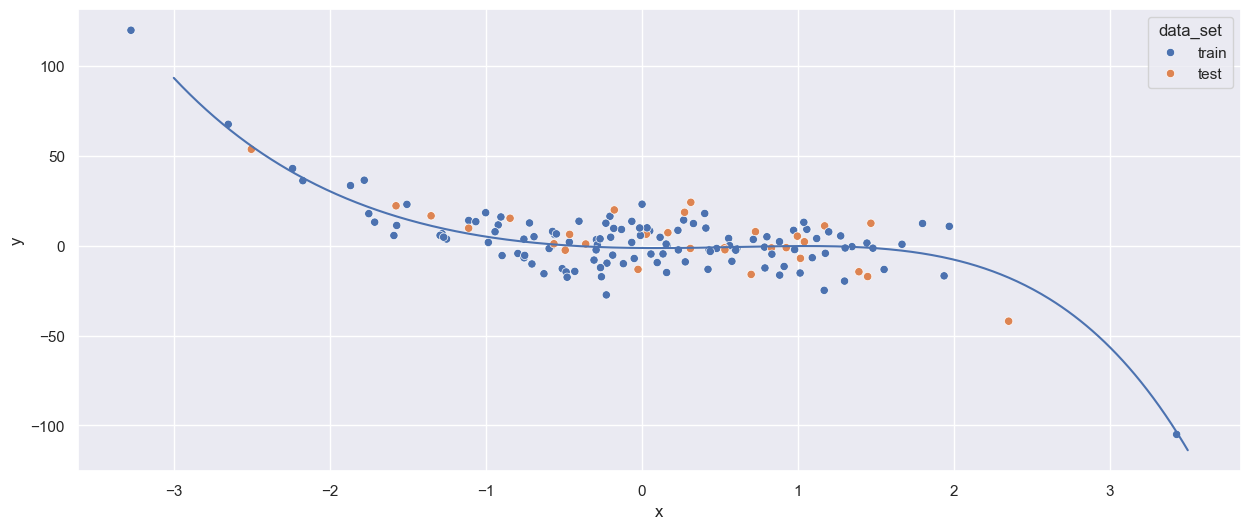

In [18]:
plt.figure(figsize=(15,6))
trained_model = np.poly1d(np.polyfit(X_train[1],y_train,polynomial_degree))
my_line = np.linspace(-3,3.5,500)
sns.scatterplot(data= plot_data, x='x', y='y', hue='data_set')
plt.plot(my_line, trained_model(my_line))
plt.show()

###  comparing the MSE_train and MSE_test

In [19]:
err_tr = y_train - model.predict(X_train)
MSE_train = np.mean(np.square(err_tr))
round(MSE_train,2)

94.61

In [21]:
err_te= y_test - model.predict(X_test)
MSE_test = np.mean(np.square(err_te))
round(MSE_test,2)

125.43

In [ ]:
# alternative way to calculate the MSE
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test  = mean_squared_error(y_test, model.predict(X_test))

print(f"MSE train set = {mse_train}")
print(f"MSE test  set = {mse_test}")

MSE train set = 94.6060664776059
MSE test  set = 125.42561727310496


### All in one function

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.2, rand_state=100):

    poly_features= PolynomialFeatures(degree=poly_degree)

    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)


    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)

    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)

   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)
    R2_train  = round(poly_model.score(X_train, y_train),3)


    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)
    R2_test  =  round(poly_model.score(X_test, y_test),3)



#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))

    return poly_degree, RMSE_train, RMSE_test, R2_train, R2_test




In [21]:
my_polynomial_regression(poly_degree=5,X=x,y=y)

(5, 9.73, 11.2, 0.759, 0.535)

In [25]:
my_polynomial_regression(poly_degree=1, X=x, y=y)

(1, 15.82, 12.44, 0.362, 0.427)

In [26]:
outputs= []
for i in range(1,8):
    outputs.append(my_polynomial_regression(poly_degree=i, X=x,y=y))

output = pd.DataFrame(outputs, columns=['Degree', 'RMSE_train', 'RMSE_test', 'R2_train', 'R2_test'])
output

,Degree,RMSE_train,RMSE_test,R2_train,R2_test
0,1,15.82,12.44,0.362,0.427
1,2,15.42,12.60,0.394,0.411
2,3,9.87,10.57,0.751,0.585
3,4,9.78,10.85,0.756,0.563
4,5,9.73,11.20,0.759,0.535
5,6,9.62,12.28,0.764,0.441
6,7,9.53,14.10,0.768,0.262


In [27]:
output= output.set_index('Degree')
output.head()

,RMSE_train,RMSE_test,R2_train,R2_test
Degree,,,,
1,15.82,12.44,0.362,0.427
2,15.42,12.60,0.394,0.411
3,9.87,10.57,0.751,0.585
4,9.78,10.85,0.756,0.563
5,9.73,11.20,0.759,0.535


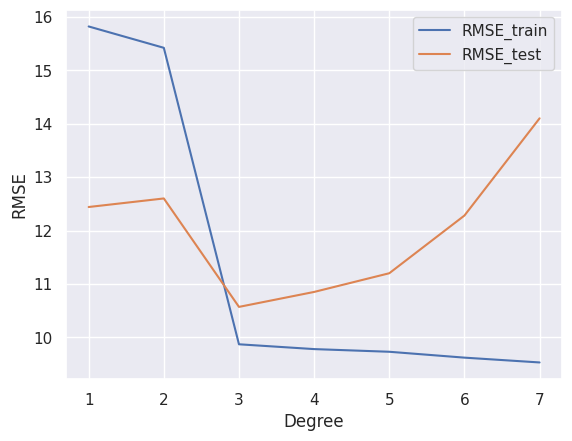

In [28]:
output.drop(['R2_train','R2_test'], axis=1).plot()
plt.ylabel("RMSE")
plt.show()

by looking at the table and graph above, what is the optimal poly degree?

But what if we don't have the labeled test set? we will estimate it by **cross validation**.

### Challenge:
Can you generate the same graph all in one line of code?

<Axes: xlabel='Degree'>

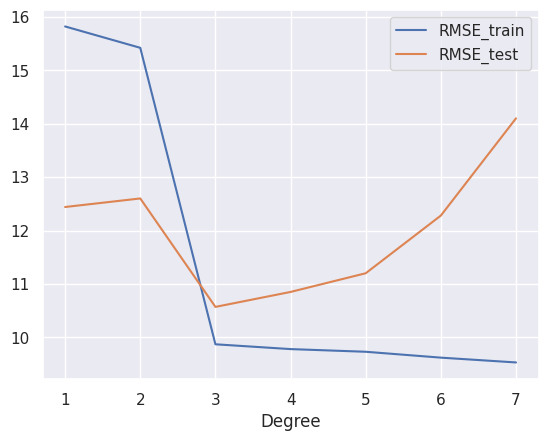

In [29]:
pd.DataFrame([my_polynomial_regression(i,x,y) for i in range(1,8)], columns=['Degree', 'RMSE_train', 'RMSE_test','R2_train', 'R2_test']).set_index('Degree').drop(['R2_train','R2_test'], axis=1).plot()

##  Finding the optimal polynomial degree

### Cross validation

In [30]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [31]:
model = LinearRegression()

In [32]:
# recall our d=5 so far!
X_train.head()

,0,1,2,3,4,5
81,1.0,-0.223170,0.049805,-0.011115,0.002481,-0.000554
99,1.0,-0.402487,0.161995,-0.065201,0.026243,-0.010562
119,1.0,-0.593892,0.352707,-0.209470,0.124402,-0.073882
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815
16,1.0,-1.712263,2.931844,-5.020086,8.595707,-14.718108


In [33]:
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
# to see the list of valid scorings try:sorted(sklearn.metrics.SCORERS.keys())

### Exercise:
Why do you think the scoring is "negative MSE" instead of "MSE"?

In [34]:
NMSE

array([  -98.75436176, -3565.91088831,   -97.51782602,  -127.74896708,
        -124.38173341])

In [35]:
MSE_CV= np.mean(-NMSE)
MSE_CV

802.8627553157592

In [36]:
RMSE_CV = np.sqrt(-NMSE).mean()
RMSE_CV

20.39662949753032

In [37]:
RMSE_CV=[]
iterator= range(1,8) # this is polynomial degree iterator
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator = LinearRegression() , X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame({'Poly degree':iterator, 'RMSE_CV':RMSE_CV })
output

,Poly degree,RMSE_CV
0,1,16.593455
1,2,19.615210
2,3,10.997007
3,4,13.840022
4,5,22.644666
5,6,35.464950
6,7,21.130538


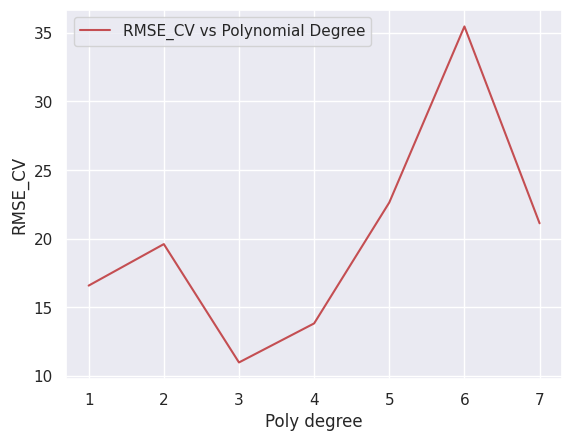

In [38]:
sns.lineplot(x='Poly degree', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs Polynomial Degree")
plt.show()

**Exercise**: replicate the same plot using set_index('Poly degree')

now using RMSE_CV, what is the optimal poly degree?

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

PyCaret is not the best package for handling polynomial regression models. Read the documentation and tell me why?

---
##  Additional links:
1. Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
2. Going beyond linearity in python: https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/
3. Validation set approach: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html
4. How to concat data frames: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html